### 简单数据集读取

In [2]:
import os

In [7]:
import torchvision
import torchvision.transforms as transforms

In [8]:
print(os.path.exists('/data_disk/dyy/python_projects/bili_dif/data/FashionMNIST'))

True


In [ ]:
'''
对于'train'这个选择测试还是训练的参数,不同加载函数有不同写法
其他的比如 background split等
不同的数据集包装的属性也不同,对于标签的叫法也不同
'''

In [10]:
fmnist=torchvision.datasets.FashionMNIST(
    root='/data_disk/dyy/python_projects/bili_dif/data',
    train=True,#表示当前加载的是训练还是测试集
    download=False,#表示是否需要下载
    transform=transforms.ToTensor()
)
fmnist


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /data_disk/dyy/python_projects/bili_dif/data
    Split: Train
    StandardTransform
Transform: ToTensor()

###### LSUN的读取

In [40]:
#下载的LSUN只有训练集和验证集,没有测试集
data_train=torchvision.datasets.LSUN(
    root='/data_disk/dyy/python_projects/bili_dif/data2/lsun-master/data',
    classes=['church_outdoor_train'],
    transform=transforms.ToTensor()
)
data_val=torchvision.datasets.LSUN(
    root='/data_disk/dyy/python_projects/bili_dif/data2/lsun-master/data',
    classes=['church_outdoor_val']
    # transform=transforms.ToTensor()
)

print(data_train)
print(data_val[2][0])

Dataset LSUN
    Number of datapoints: 126227
    Root location: /data_disk/dyy/python_projects/bili_dif/data2/lsun-master/data
    Classes: ['church_outdoor_train']
    StandardTransform
Transform: ToTensor()
<PIL.Image.Image image mode=RGB size=256x358 at 0x7F4CA4F4E620>


In [31]:
print('总样本数为:',len(data_train))
#某一个样本长度为2,表示Tensor中有两个元素,表示样本和对应的标签
print(len(data_train[0]))
#输出为 torch.Size([3, 392, 256]) 表示三通道,尺寸为392*256
print(data_train[0][0].shape)
img_ten=data_train[0][1]
print(img_ten)

总样本数为: 126227
2
torch.Size([3, 392, 256])
0


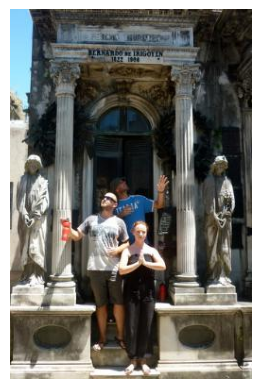

In [27]:
import torch
import torchvision.utils as utils
import matplotlib.pyplot as plt

# 假设你已经有一个形状为 [3, 256, 256] 的张量
tensor_image =img_ten   # 这里用随机张量作为示例

# 将张量转换为 [256, 256, 3] 的格式
# 方法一：使用 permute
image = tensor_image.permute(1, 2, 0)


# 显示图像
plt.imshow(image)
plt.axis('off')  # 关闭坐标轴
plt.show()

###### 从LSUN中导入两个数据集,进行二分类的训练

In [49]:
data_train=torchvision.datasets.LSUN(
    root='/data_disk/dyy/python_projects/bili_dif/data2/lsun-master/data',
    classes=['church_outdoor_train','classroom_train'],
    transform=transforms.ToTensor()
)
print(data_train)
print()
data_val=torchvision.datasets.LSUN(
    root='/data_disk/dyy/python_projects/bili_dif/data2/lsun-master/data',
    classes=['church_outdoor_val','classroom_val'],
    transform=transforms.ToTensor()
)
print(data_val)

Dataset LSUN
    Number of datapoints: 294330
    Root location: /data_disk/dyy/python_projects/bili_dif/data2/lsun-master/data
    Classes: ['church_outdoor_train', 'classroom_train']
    StandardTransform
Transform: ToTensor()

Dataset LSUN
    Number of datapoints: 600
    Root location: /data_disk/dyy/python_projects/bili_dif/data2/lsun-master/data
    Classes: ['church_outdoor_val', 'classroom_val']
    StandardTransform
Transform: ToTensor()
